In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
data=pd.read_csv("intern_car_regg.csv")
data.head()

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,...,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN


In [3]:
data.columns = data.columns.str.strip() 

In [4]:
print(data.columns)

Index(['Avtosalon', 'Qiymet', 'Valyuta', 'Şəhər', 'Marka', 'Model',
       'Buraxılış ili', 'Ban növü', 'Rəng', 'Mühərrik', 'Yürüş',
       'Sürətlər qutusu', 'Ötürücü', 'Yeni', 'Vəziyyəti', 'Yeniləndi',
       'Baxışların sayı', 'Extra', 'Etrafli', 'Sahiblər',
       'Hansı bazar üçün yığılıb', 'Yerlərin sayı', 'Qəzalı'],
      dtype='object')


In [5]:
print("Shape:", data.shape)

Shape: (10000, 23)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [7]:
# Missing Data
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(" Missing Values Percentage:\n", missing_percentage)

 Missing Values Percentage:
 Avtosalon                    0.00
Qiymet                       0.00
Valyuta                      0.00
Şəhər                        0.00
Marka                        0.00
Model                        0.00
Buraxılış ili                0.00
Ban növü                     0.00
Rəng                         0.00
Mühərrik                     0.00
Yürüş                        0.00
Sürətlər qutusu              0.00
Ötürücü                      0.00
Yeni                         0.00
Vəziyyəti                    0.28
Yeniləndi                    0.00
Baxışların sayı              0.00
Extra                        7.64
Etrafli                      2.82
Sahiblər                    38.07
Hansı bazar üçün yığılıb    32.98
Yerlərin sayı               31.68
Qəzalı                      99.68
dtype: float64


In [8]:
#data.dropna(thresh = data.shape[1]*0.7, axis=1)
data = data.drop(data.columns[data.isnull().mean() > 0.7], axis=1)

In [9]:
# these columns were deleted
data=data.drop(columns=["Yeni", "Yeniləndi", "Sahiblər", "Baxışların sayı", "Şəhər", "Etrafli", "Avtosalon"]) 

In [10]:
data.columns

Index(['Qiymet', 'Valyuta', 'Marka', 'Model', 'Buraxılış ili', 'Ban növü',
       'Rəng', 'Mühərrik', 'Yürüş', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti',
       'Extra', 'Hansı bazar üçün yığılıb', 'Yerlərin sayı'],
      dtype='object')

In [11]:
# data types
print("data types\n",data.dtypes)

data types
 Qiymet                       int64
Valyuta                     object
Marka                       object
Model                       object
Buraxılış ili                int64
Ban növü                    object
Rəng                        object
Mühərrik                    object
Yürüş                       object
Sürətlər qutusu             object
Ötürücü                     object
Vəziyyəti                   object
Extra                       object
Hansı bazar üçün yığılıb    object
Yerlərin sayı               object
dtype: object


In [12]:
data["Yerlərin sayı"].unique()

array(['5', '7', nan, '4', '3', '2', '8+', '1', '6'], dtype=object)

In [13]:
data["Yerlərin sayı"] = data["Yerlərin sayı"].replace('8+', '9')
data["Yerlərin sayı"] = pd.to_numeric(data["Yerlərin sayı"])

In [14]:
data["Vəziyyəti"].unique()

array(['Vuruğu yoxdur, rənglənib', 'Vuruğu yoxdur, rənglənməyib',
       'Vuruğu var, rənglənib', 'Vuruğu var, rənglənməyib', nan],
      dtype=object)

In [15]:
data['Valyuta'] = data['Valyuta'].astype('category')
data['Vəziyyəti'] = data['Vəziyyəti'].astype('category') 
print("Valyut:", data["Valyuta"].dtype)
print("Vəziyyəti:", data["Vəziyyəti"].dtype)

Valyut: category
Vəziyyəti: category


In [16]:
# yuruyus km sil numeric ele
data["Yürüş"] = data["Yürüş"].str.replace("km", "").str.replace(" ", "")
print(data["Yürüş"].dtype)
data["Yürüş"] = pd.to_numeric(data["Yürüş"])
print(data["Yürüş"].dtype)

object
int64


In [17]:
from sklearn.impute import SimpleImputer
imputers_value = {
    "Vəziyyəti": "most_frequent",
    "Extra": "most_frequent",
    "Hansı bazar üçün yığılıb": "most_frequent",
    "Yerlərin sayı": "median"
}

for column, i in imputers_value.items():
    imputer = SimpleImputer(strategy=i)
    data[column] = imputer.fit_transform(data[[column]]).ravel() 

In [18]:
data.isnull().sum()

Qiymet                      0
Valyuta                     0
Marka                       0
Model                       0
Buraxılış ili               0
Ban növü                    0
Rəng                        0
Mühərrik                    0
Yürüş                       0
Sürətlər qutusu             0
Ötürücü                     0
Vəziyyəti                   0
Extra                       0
Hansı bazar üçün yığılıb    0
Yerlərin sayı               0
dtype: int64

In [19]:
data["Valyuta"].unique()

['AZN', 'USD', 'EUR']
Categories (3, object): ['AZN', 'EUR', 'USD']

In [20]:
exchange = {'AZN': 1, 'USD': 1.7, 'EUR': 1.9}
data['Valyuta'] = data['Valyuta'].astype(str)
data['Valyuta'] = data['Valyuta'].map(exchange)
data['Qiymet_AZN'] = data['Qiymet'] * data['Valyuta']
data["Qiymet_AZN"] = pd.to_numeric(data["Qiymet_AZN"])
print(data["Qiymet_AZN"])

0        13500.0
1        39950.0
2        33200.0
3        17000.0
4        61200.0
          ...   
9995     38930.0
9996    166600.0
9997      9800.0
9998     17800.0
9999      5000.0
Name: Qiymet_AZN, Length: 10000, dtype: float64


In [21]:
data = data.drop(columns=["Qiymet", "Valyuta"])

In [22]:
data.columns

Index(['Marka', 'Model', 'Buraxılış ili', 'Ban növü', 'Rəng', 'Mühərrik',
       'Yürüş', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti', 'Extra',
       'Hansı bazar üçün yığılıb', 'Yerlərin sayı', 'Qiymet_AZN'],
      dtype='object')

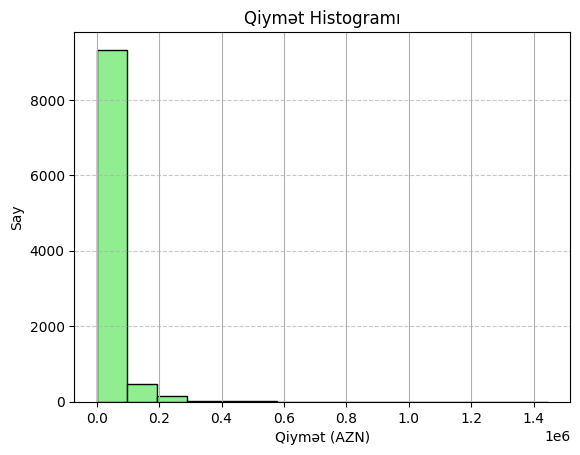

In [23]:
data['Qiymet_AZN'].hist(bins=15, color='lightgreen', edgecolor='black')
plt.title('Qiymət Histogramı')
plt.xlabel('Qiymət (AZN)')
plt.ylabel('Say')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
extra_cols = []
for extras in data["Extra"].dropna():
    for new_cols in extras.split(", "):
        if new_cols not in extra_cols:
            extra_cols.append(new_cols)

print(extra_cols)

['Yüngül lehimli disklər', 'ABS', 'Kondisioner', 'Dəri salon', 'Ksenon lampalar', 'Yan pərdələr', 'Yağış sensoru', 'Mərkəzi qapanma', 'Park radarı', 'Oturacaqların isidilməsi', 'Arxa görüntü kamerası', 'Oturacaqların ventilyasiyası', 'Lyuk']


In [25]:
for cols in extra_cols:
    data[cols] = ["var" if new_cols in str(extras).split(", ") else "yox" for extras in data["Extra"]]


In [26]:
data = data.drop(columns=["Extra"])

In [27]:
# Vəziyyəti stununu parcaladım 
veziyeti_cols = []
for veziyet in data["Vəziyyəti"].dropna():
    for col_new in veziyet.split(", "):
        if col_new not in veziyeti_cols:
            veziyeti_cols.append(col_new)

print(veziyeti_cols)

['Vuruğu yoxdur', 'rənglənib', 'rənglənməyib', 'Vuruğu var']


In [28]:
data["Rənglənmək"] = ["hə" if "rənglənib" in str(veziyyet).lower() else "yox" for veziyyet in data["Vəziyyəti"]]
data["Vurulma"] = ["hə" if "vuruğu var" in str(veziyyet).lower() else "yox" for veziyyet in data["Vəziyyəti"]]

In [29]:
data=data.drop(columns=["Vəziyyəti"])

In [30]:
data["Həcmi (L)"] = data["Mühərrik"].str.extract(r"(\d+\.\d+) L")[0]
data["At Gücü (a.g.)"] = data["Mühərrik"].str.extract(r"(\d+) a\.g\.")[0]
data["Yanacaq Növü"] = data["Mühərrik"].str.extract(r"(\bBenzin\b|\bDizel\b|\bHibrid\b)")[0]

print(data[["Mühərrik", "Həcmi (L)", "At Gücü (a.g.)", "Yanacaq Növü"]].head())

                Mühərrik Həcmi (L) At Gücü (a.g.) Yanacaq Növü
0  1.6 L/101 a.g./Benzin       1.6            101       Benzin
1  1.8 L/178 a.g./Hibrid       1.8            178       Hibrid
2   2.0 L/184 a.g./Dizel       2.0            184        Dizel
3  1.5 L/181 a.g./Benzin       1.5            181       Benzin
4  2.0 L/173 a.g./Benzin       2.0            173       Benzin


In [31]:
data["Həcmi (L)"] = pd.to_numeric(data["Həcmi (L)"])
data["At Gücü (a.g.)"] = pd.to_numeric(data["At Gücü (a.g.)"])
data['Yanacaq Növü'] = data['Yanacaq Növü'].astype('category') 

print(data[["Həcmi (L)", "At Gücü (a.g.)", "Yanacaq Növü"]].head())
data=data.drop(columns=["Mühərrik"])

   Həcmi (L)  At Gücü (a.g.) Yanacaq Növü
0        1.6             101       Benzin
1        1.8             178       Hibrid
2        2.0             184        Dizel
3        1.5             181       Benzin
4        2.0             173       Benzin


In [32]:
print(data["Həcmi (L)"].dtype)
print(data["At Gücü (a.g.)"].dtype)
print(data["Yanacaq Növü"].dtype)

float64
int64
category


In [33]:
data.head()

,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Hansı bazar üçün yığılıb,Yerlərin sayı,...,Park radarı,Oturacaqların isidilməsi,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Rənglənmək,Vurulma,Həcmi (L),At Gücü (a.g.),Yanacaq Növü
0,Opel,Vectra,2000,Hetçbek,Göy,370000,Mexaniki,Ön,Avropa,5.0,...,var,var,var,var,var,hə,yox,1.6,101,Benzin
1,Toyota,Corolla,2023,Sedan,Mavi,0,Avtomat,Ön,Rəsmi diler,5.0,...,var,var,var,var,var,yox,yox,1.8,178,Hibrid
2,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636,Avtomat,Ön,Avropa,7.0,...,var,var,var,var,var,yox,yox,2.0,184,Dizel
3,Ford,Fusion,2015,Sedan,Göy,120873,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,1.5,181,Benzin
4,Toyota,RAV4,2022,Offroader / SUV,Qara,0,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,2.0,173,Benzin


In [34]:
numerical_data=data.select_dtypes(include=["int64", "float64"])

In [35]:
z_scores = np.abs(zscore(numerical_data))
outliers_z_score = data[(z_scores > 3).any(axis=1)] 
outliers_z_score

,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Hansı bazar üçün yığılıb,Yerlərin sayı,...,Park radarı,Oturacaqların isidilməsi,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Rənglənmək,Vurulma,Həcmi (L),At Gücü (a.g.),Yanacaq Növü
23,LADA (VAZ),2106,1990,Sedan,Ağ,758377,Mexaniki,Arxa,Rusiya,5.0,...,yox,yox,yox,yox,yox,yox,yox,1.5,65,Benzin
44,Mercedes,GLE 53 AMG,2022,Offroader / SUV,Qara,12000,Avtomat,Tam,Rəsmi diler,5.0,...,var,var,var,var,var,yox,yox,3.0,435,Benzin
66,LADA (VAZ),2106,1984,Sedan,Ağ,250000,Mexaniki,Arxa,Rusiya,5.0,...,var,var,var,var,var,hə,yox,1.5,65,Benzin
69,LADA (VAZ),21013,1984,Sedan,Gümüşü,65322,Mexaniki,Arxa,Avropa,5.0,...,var,var,var,var,var,yox,yox,1.6,75,Benzin
121,Mercedes-Maybach,S 580 4MATIC,2023,Sedan,Qara,0,Avtomat,Tam,Rəsmi diler,5.0,...,var,var,var,var,var,yox,yox,4.0,503,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,Lexus,LX 500d,2023,Offroader / SUV,Qara,0,Avtomat,Tam,Rəsmi diler,5.0,...,var,var,var,var,var,yox,yox,3.3,300,Dizel
9920,Land Rover,Range Rover,2020,Offroader / SUV,Qara,22800,Avtomat,Tam,Avropa,5.0,...,var,var,var,var,var,yox,yox,3.0,400,Benzin
9944,Mercedes,GLS 580,2019,Offroader / SUV,Qara,33000,Avtomat,Tam,Rəsmi diler,7.0,...,var,var,var,var,var,yox,yox,4.0,489,Benzin
9970,Shacman,F3000,2011,Yük maşını,Ağ,200000,Mexaniki,Arxa,Avropa,2.0,...,yox,yox,yox,yox,yox,yox,yox,9.5,375,Dizel


<Axes: ylabel='Yürüş'>

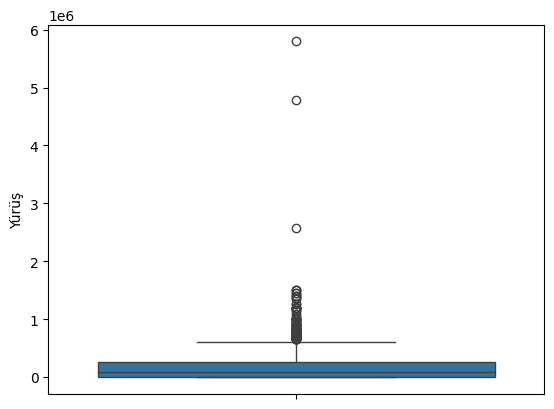

In [36]:
sns.boxplot(outliers_z_score["Yürüş"])

In [37]:
Q1 = data['Yürüş'].quantile(0.25)
Q3 = data['Yürüş'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
no_outliers = data[(data['Yürüş'] > lower_bound) & (data['Yürüş'] < upper_bound)]

In [38]:
no_outliers

,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Hansı bazar üçün yığılıb,Yerlərin sayı,...,Park radarı,Oturacaqların isidilməsi,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Rənglənmək,Vurulma,Həcmi (L),At Gücü (a.g.),Yanacaq Növü
0,Opel,Vectra,2000,Hetçbek,Göy,370000,Mexaniki,Ön,Avropa,5.0,...,var,var,var,var,var,hə,yox,1.6,101,Benzin
1,Toyota,Corolla,2023,Sedan,Mavi,0,Avtomat,Ön,Rəsmi diler,5.0,...,var,var,var,var,var,yox,yox,1.8,178,Hibrid
2,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636,Avtomat,Ön,Avropa,7.0,...,var,var,var,var,var,yox,yox,2.0,184,Dizel
3,Ford,Fusion,2015,Sedan,Göy,120873,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,1.5,181,Benzin
4,Toyota,RAV4,2022,Offroader / SUV,Qara,0,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,2.0,173,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,BMW,528,2016,Sedan,Qara,100000,Avtomat,Arxa,Avropa,5.0,...,var,var,var,var,var,yox,yox,2.0,245,Benzin
9996,Land Rover,Range Rover,2019,Offroader / SUV,Qara,84000,Avtomat,Tam,Avropa,5.0,...,var,var,var,var,var,yox,yox,3.0,340,Benzin
9997,Chevrolet,Lacetti,2007,Sedan,Gümüşü,299785,Avtomat,Ön,Koreya,5.0,...,var,var,var,var,var,yox,yox,1.6,109,Benzin
9998,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,181500,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,2.0,140,Dizel


<Axes: ylabel='Yürüş'>

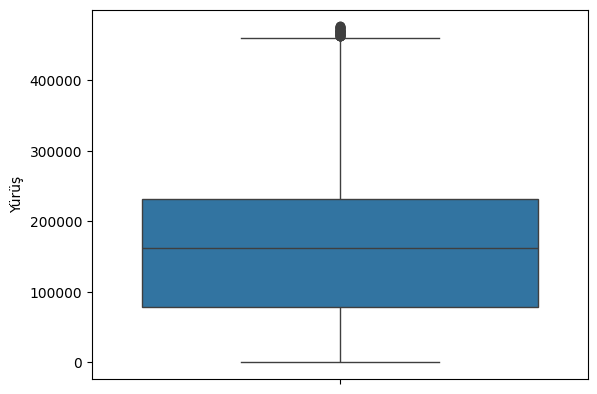

In [39]:
sns.boxplot(y=no_outliers["Yürüş"])

In [40]:
numerical_data.corr()

,Buraxılış ili,Yürüş,Yerlərin sayı,Qiymet_AZN,Həcmi (L),At Gücü (a.g.)
Buraxılış ili,1.000000,-0.444927,0.149291,0.436817,0.021188,0.351837
Yürüş,-0.444927,1.000000,-0.121023,-0.281442,0.047555,-0.082431
Yerlərin sayı,0.149291,-0.121023,1.000000,0.140356,0.174685,0.136128
Qiymet_AZN,0.436817,-0.281442,0.140356,1.000000,0.365385,0.624858
Həcmi (L),0.021188,0.047555,0.174685,0.365385,1.000000,0.713977
At Gücü (a.g.),0.351837,-0.082431,0.136128,0.624858,0.713977,1.000000


<Axes: >

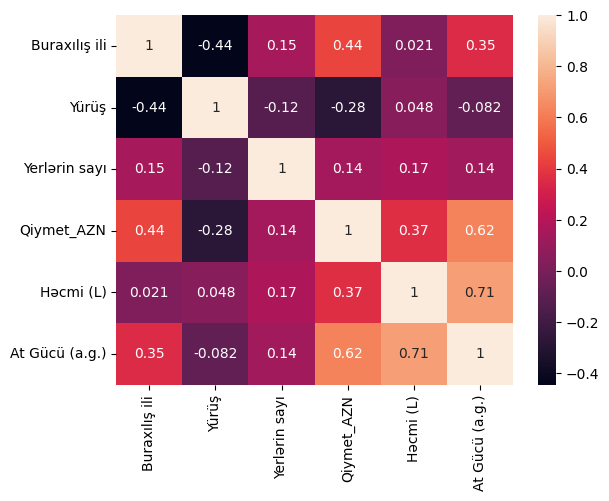

In [41]:
sns.heatmap(numerical_data.corr(method = 'pearson') , annot=True)

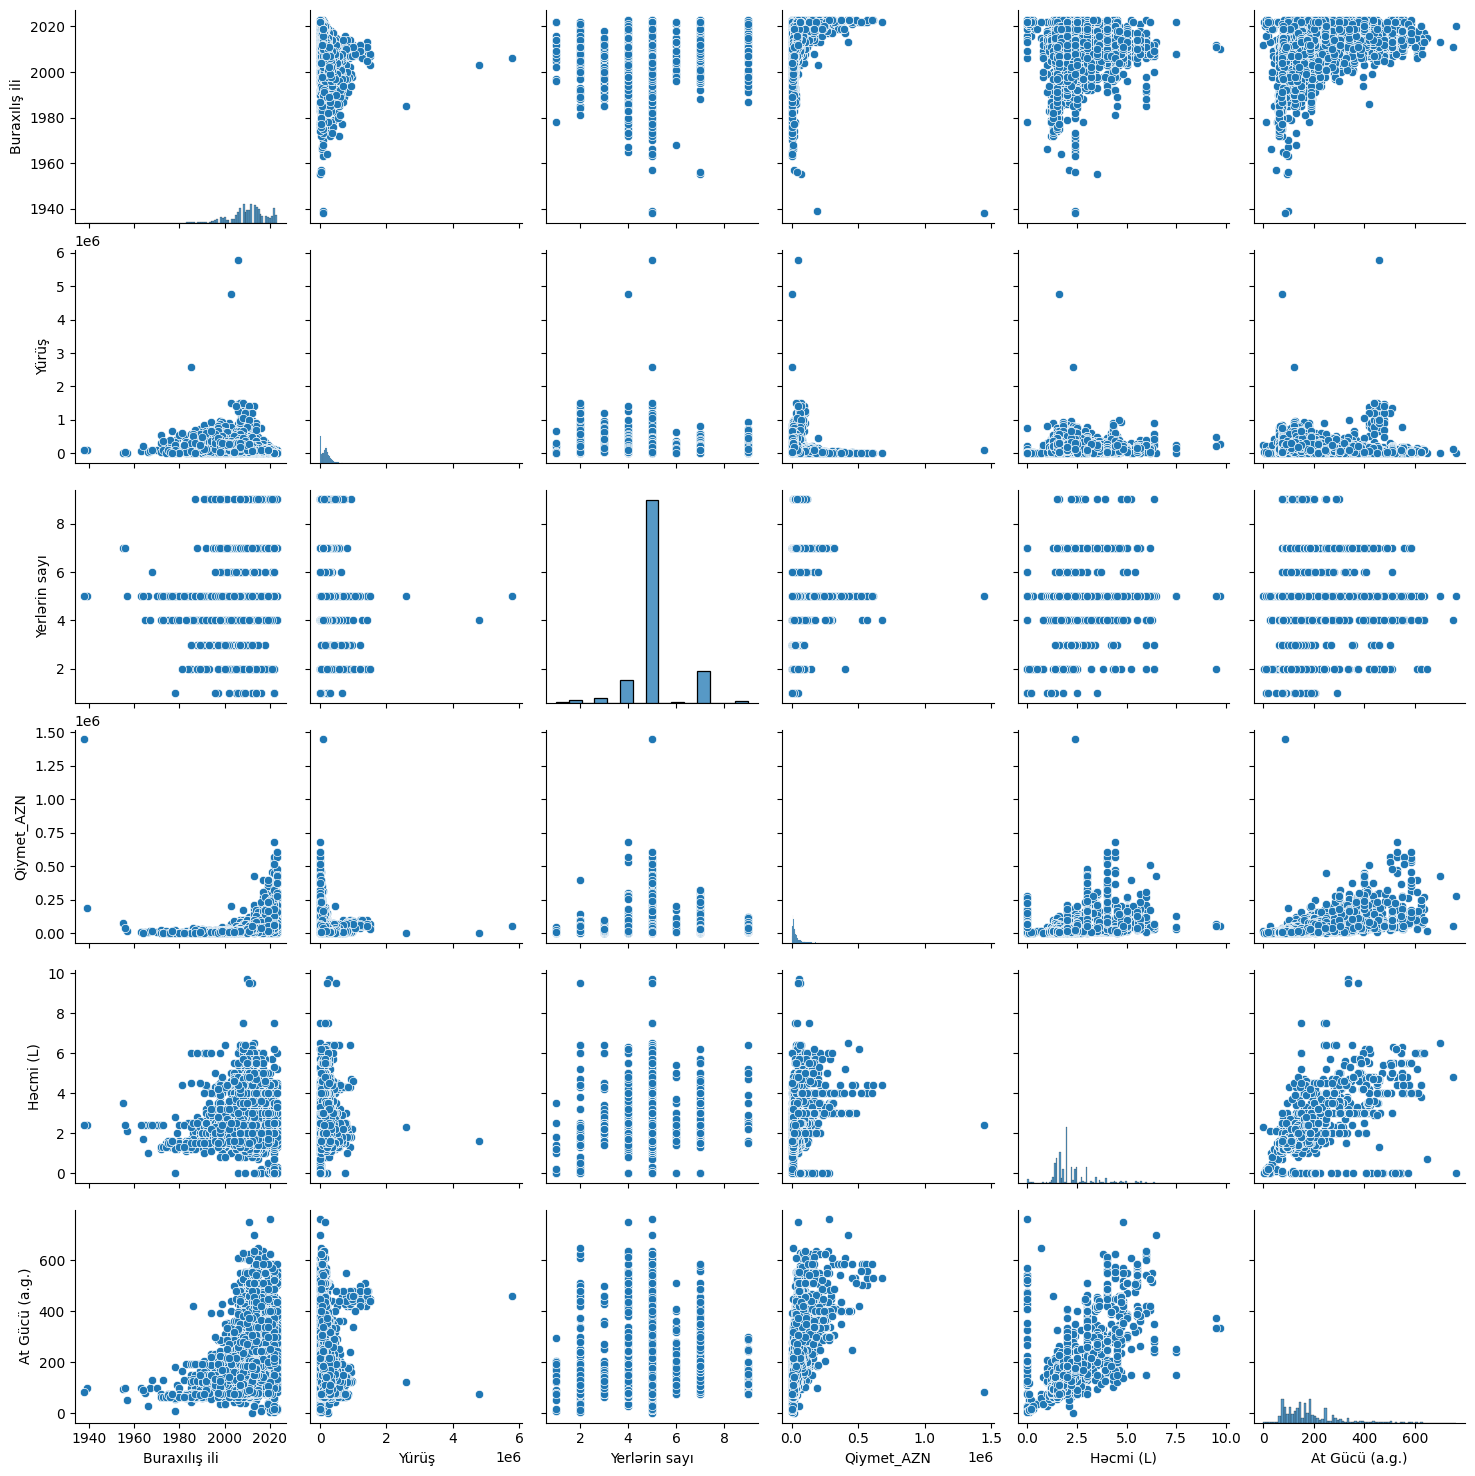

In [42]:
sns.pairplot(data)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)
data_standardized

,Buraxılış ili,Yürüş,Yerlərin sayı,Qiymet_AZN,Həcmi (L),At Gücü (a.g.)
0,-1.200585,1.202873,-0.117064,-0.457527,-0.622083,-0.813485
1,1.542138,-1.112924,-0.117064,0.069555,-0.409565,-0.019751
2,0.349649,-0.057446,2.015253,-0.064955,-0.197047,0.042099
3,0.588147,-0.356390,-0.117064,-0.387781,-0.728342,0.011174
4,1.422889,-1.112924,-0.117064,0.493015,-0.197047,-0.071292
...,...,...,...,...,...,...
9995,0.707396,-0.487033,-0.117064,0.049229,-0.197047,0.670902
9996,1.065142,-0.587175,-0.117064,2.593373,0.865543,1.650185
9997,-0.365843,0.763404,-0.117064,-0.531259,-0.622083,-0.731019
9998,-0.365843,0.023068,-0.117064,-0.371839,-0.197047,-0.411464


<Axes: xlabel='Qiymet_AZN', ylabel='Density'>

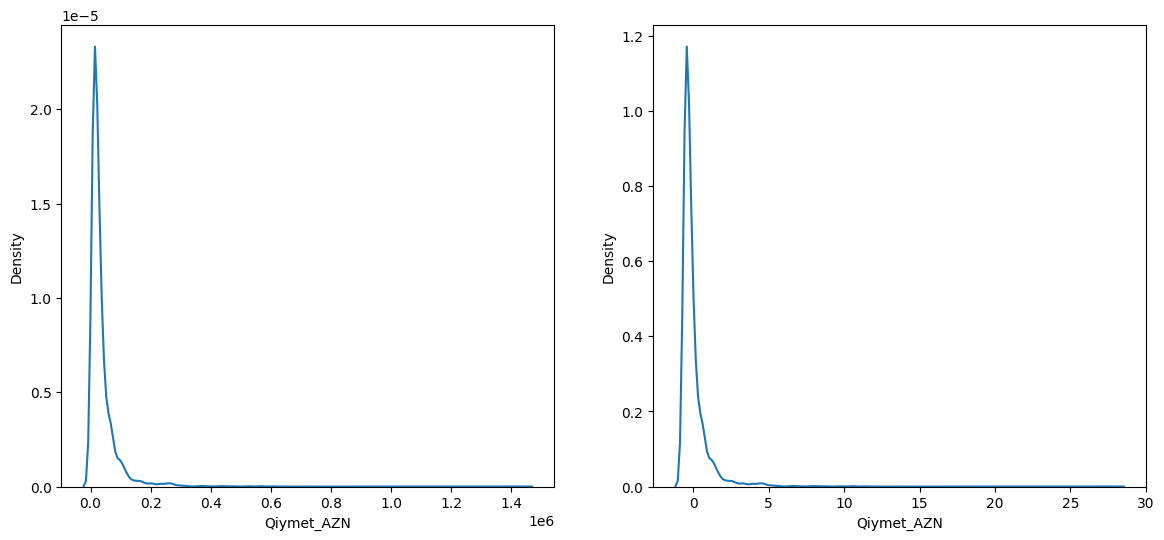

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.kdeplot(data['Qiymet_AZN'] , ax=axes[0])
sns.kdeplot(data_standardized['Qiymet_AZN'] , ax=axes[1])

In [45]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
data_normalized = pd.DataFrame(normalizer.fit_transform(numerical_data), columns=numerical_data.columns)
data_normalized

,Buraxılış ili,Yürüş,Yerlərin sayı,Qiymet_AZN,Həcmi (L),At Gücü (a.g.)
0,0.729412,0.063828,0.50,0.008588,0.164948,0.131579
1,1.000000,0.000000,0.50,0.026906,0.185567,0.232895
2,0.882353,0.029091,0.75,0.022231,0.206186,0.240789
3,0.905882,0.020851,0.50,0.011012,0.154639,0.236842
4,0.988235,0.000000,0.50,0.041623,0.206186,0.226316
...,...,...,...,...,...,...
9995,0.917647,0.017251,0.50,0.026200,0.206186,0.321053
9996,0.952941,0.014491,0.50,0.114620,0.309278,0.446053
9997,0.811765,0.051715,0.50,0.006025,0.164948,0.142105
9998,0.811765,0.031310,0.50,0.011566,0.206186,0.182895


<Axes: xlabel='Qiymet_AZN', ylabel='Density'>

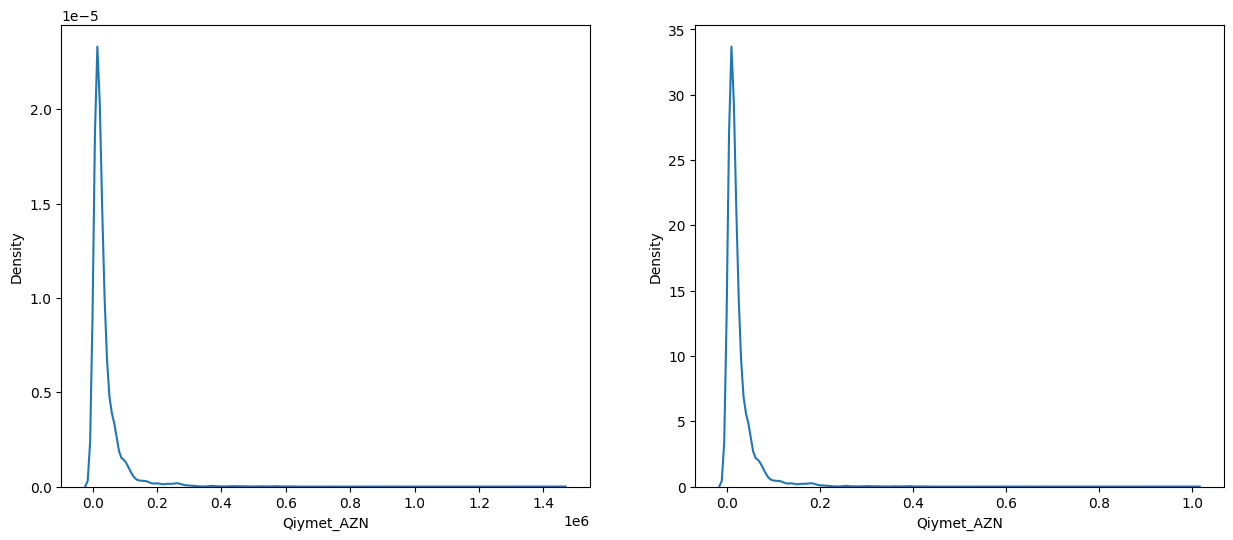

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.kdeplot(data['Qiymet_AZN'] , ax=axes[0])
sns.kdeplot(data_normalized['Qiymet_AZN'] , ax=axes[1])

In [47]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_RobustScaler = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)
data_RobustScaler

,Buraxılış ili,Yürüş,Yerlərin sayı,Qiymet_AZN,Həcmi (L),At Gücü (a.g.)
0,-1.222222,1.282008,0.0,-0.300752,-0.444444,-0.568807
1,1.333333,-1.047113,0.0,0.646259,-0.222222,0.137615
2,0.222222,0.014437,2.0,0.404583,0.000000,0.192661
3,0.444444,-0.286227,0.0,-0.175439,-0.555556,0.165138
4,1.222222,-1.047113,0.0,1.407089,0.000000,0.091743
...,...,...,...,...,...,...
9995,0.555556,-0.417621,0.0,0.609739,0.000000,0.752294
9996,0.888889,-0.518339,0.0,5.180809,1.111111,1.623853
9997,-0.444444,0.840010,0.0,-0.433226,-0.444444,-0.495413
9998,-0.444444,0.095415,0.0,-0.146796,0.000000,-0.211009


<Axes: xlabel='Qiymet_AZN', ylabel='Density'>

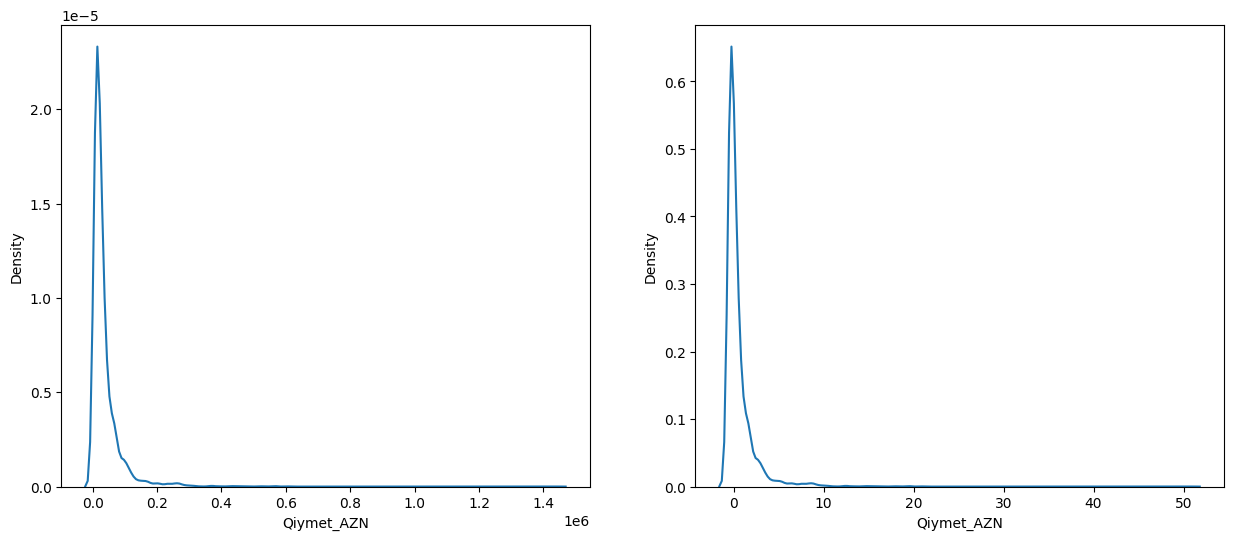

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.kdeplot(data['Qiymet_AZN'] , ax=axes[0])
sns.kdeplot(data_RobustScaler['Qiymet_AZN'] , ax=axes[1])

In [49]:
data.head()

,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Hansı bazar üçün yığılıb,Yerlərin sayı,...,Park radarı,Oturacaqların isidilməsi,Arxa görüntü kamerası,Oturacaqların ventilyasiyası,Lyuk,Rənglənmək,Vurulma,Həcmi (L),At Gücü (a.g.),Yanacaq Növü
0,Opel,Vectra,2000,Hetçbek,Göy,370000,Mexaniki,Ön,Avropa,5.0,...,var,var,var,var,var,hə,yox,1.6,101,Benzin
1,Toyota,Corolla,2023,Sedan,Mavi,0,Avtomat,Ön,Rəsmi diler,5.0,...,var,var,var,var,var,yox,yox,1.8,178,Hibrid
2,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636,Avtomat,Ön,Avropa,7.0,...,var,var,var,var,var,yox,yox,2.0,184,Dizel
3,Ford,Fusion,2015,Sedan,Göy,120873,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,1.5,181,Benzin
4,Toyota,RAV4,2022,Offroader / SUV,Qara,0,Avtomat,Ön,Avropa,5.0,...,var,var,var,var,var,yox,yox,2.0,173,Benzin


In [50]:
data.columns

Index(['Marka', 'Model', 'Buraxılış ili', 'Ban növü', 'Rəng', 'Yürüş',
       'Sürətlər qutusu', 'Ötürücü', 'Hansı bazar üçün yığılıb',
       'Yerlərin sayı', 'Qiymet_AZN', 'Yüngül lehimli disklər', 'ABS',
       'Kondisioner', 'Dəri salon', 'Ksenon lampalar', 'Yan pərdələr',
       'Yağış sensoru', 'Mərkəzi qapanma', 'Park radarı',
       'Oturacaqların isidilməsi', 'Arxa görüntü kamerası',
       'Oturacaqların ventilyasiyası', 'Lyuk', 'Rənglənmək', 'Vurulma',
       'Həcmi (L)', 'At Gücü (a.g.)', 'Yanacaq Növü'],
      dtype='object')

In [51]:
categoric_columns = data.select_dtypes(include=['object', 'category']).columns
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
print("\ncat:\n", categoric_columns, "\nnum:\n", numeric_columns)


cat:
 Index(['Marka', 'Model', 'Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü',
       'Hansı bazar üçün yığılıb', 'Yüngül lehimli disklər', 'ABS',
       'Kondisioner', 'Dəri salon', 'Ksenon lampalar', 'Yan pərdələr',
       'Yağış sensoru', 'Mərkəzi qapanma', 'Park radarı',
       'Oturacaqların isidilməsi', 'Arxa görüntü kamerası',
       'Oturacaqların ventilyasiyası', 'Lyuk', 'Rənglənmək', 'Vurulma',
       'Yanacaq Növü'],
      dtype='object') 
num:
 Index(['Buraxılış ili', 'Yürüş', 'Yerlərin sayı', 'Qiymet_AZN', 'Həcmi (L)',
       'At Gücü (a.g.)'],
      dtype='object')


In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [53]:
label_encoders = {}
for col in categoric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
x=data.drop(columns=["Qiymet_AZN"])
y=data["Qiymet_AZN"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # train ve test-e ayırmaq

In [56]:
# model qurmaq, buarada n_estimators=100 regressiya ağacındakı qerar sayıdır, 
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [57]:
y_pred = model.predict(X_test)   # Proqnoz etmək

In [58]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

mae_val = mae(y_test, y_pred)
mse_val = mse(y_test, y_pred)
rmse = np.sqrt(mse_val)
r2_val = r2(y_test, y_pred)

print(mae_val, mse_val, rmse, r2_val)


4777.442403085357 153218527.52692518 12378.147176654718 0.9287836035593465


In [62]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                   param_distributions=param_grid, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, random_state=0)  # 5 qatlı kross-validasiya

In [63]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring='neg_mean_squared_error')

In [64]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mse(y_test, y_pred_best)

print(f"Optimallaşdırılmış model üçün Ortalama Kvadrat Xətası: {mse_best}")

Optimallaşdırılmış model üçün Ortalama Kvadrat Xətası: 153967634.3100926
